#### Use a dataset of employee information and build a model that can predict which employees are most likely to leave the company

In [17]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from lazypredict.Supervised import LazyClassifier
from sklearn.svm import SVC

#### Exploring the data & preprocessing

In [2]:
data = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
# Have the objects columns in a list
object_columns = [column for column in data.columns if data[column].dtype == 'object' and column != "Attrition"]
object_columns

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [5]:
# Values distribution in each object column
for column in object_columns:
    print(f"In {column}: {data[column].value_counts()} \n\n")

In BusinessTravel: Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64 


In Department: Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64 


In EducationField: Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64 


In Gender: Male      882
Female    588
Name: Gender, dtype: int64 


In JobRole: Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64 


In MaritalStatus: Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64 


In Over18: Y 

In [6]:
# Encoding the categorical features and the target
encoded_data = pd.get_dummies(data, columns=object_columns)
encoded_data["Attrition"] = encoded_data["Attrition"].map({"Yes":1, "No":0})
encoded_data.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1,1102,1,2,1,1,2,94,3,...,0,0,1,0,0,0,1,1,0,1
1,49,0,279,8,1,1,2,3,61,2,...,0,1,0,0,0,1,0,1,1,0
2,37,1,1373,2,2,1,4,4,92,2,...,0,0,0,0,0,0,1,1,0,1
3,33,0,1392,3,4,1,5,4,56,3,...,0,1,0,0,0,1,0,1,0,1
4,27,0,591,2,1,1,7,1,40,3,...,0,0,0,0,0,1,0,1,1,0


In [7]:
encoded_data["Attrition"].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Attrition'}>,
        <Axes: title={'center': 'DailyRate'}>,
        <Axes: title={'center': 'DistanceFromHome'}>,
        <Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'EmployeeCount'}>,
        <Axes: title={'center': 'EmployeeNumber'}>],
       [<Axes: title={'center': 'EnvironmentSatisfaction'}>,
        <Axes: title={'center': 'HourlyRate'}>,
        <Axes: title={'center': 'JobInvolvement'}>,
        <Axes: title={'center': 'JobLevel'}>,
        <Axes: title={'center': 'JobSatisfaction'}>,
        <Axes: title={'center': 'MonthlyIncome'}>,
        <Axes: title={'center': 'MonthlyRate'}>],
       [<Axes: title={'center': 'NumCompaniesWorked'}>,
        <Axes: title={'center': 'PercentSalaryHike'}>,
        <Axes: title={'center': 'PerformanceRating'}>,
        <Axes: title={'center': 'RelationshipSatisfaction'}>,
        <Axes: title={'center': 'StandardHours'}>,
        <Axes: title

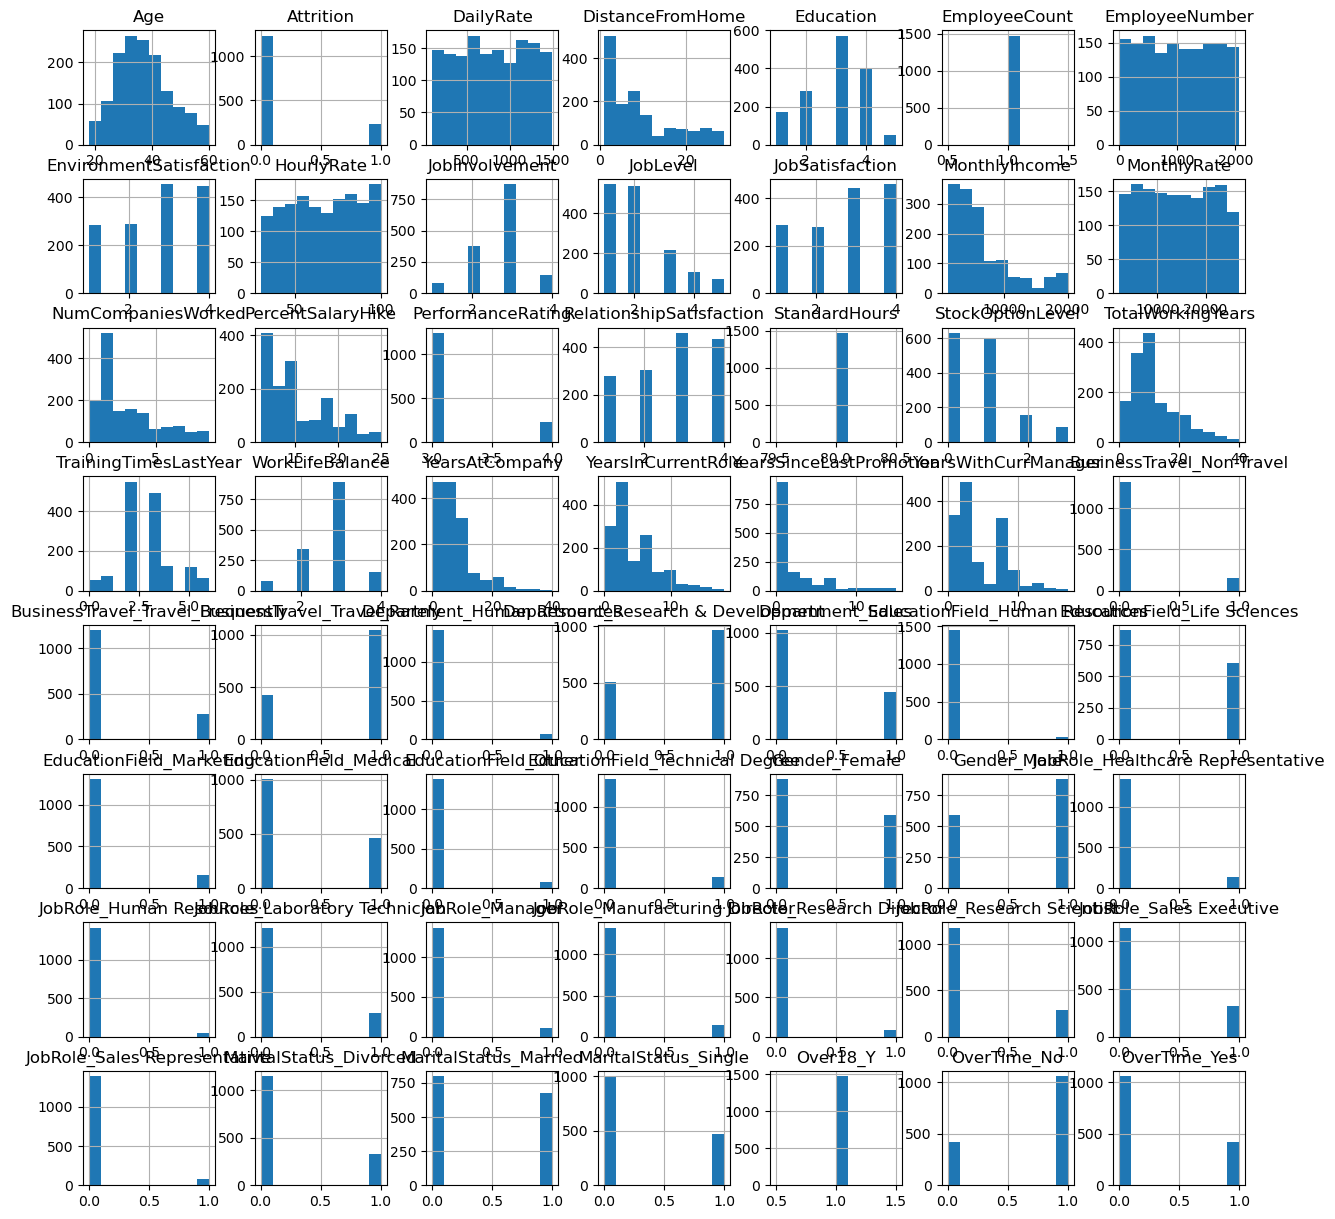

In [8]:
encoded_data.hist(figsize=(15, 15))

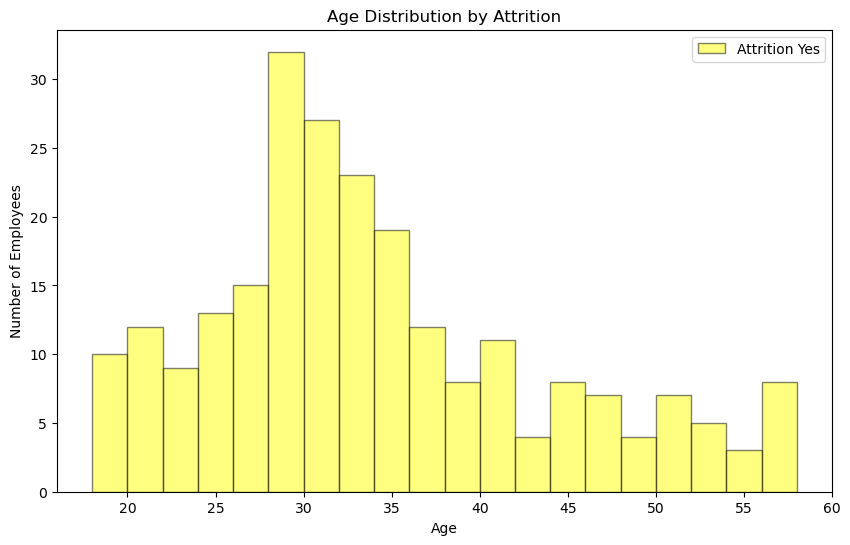

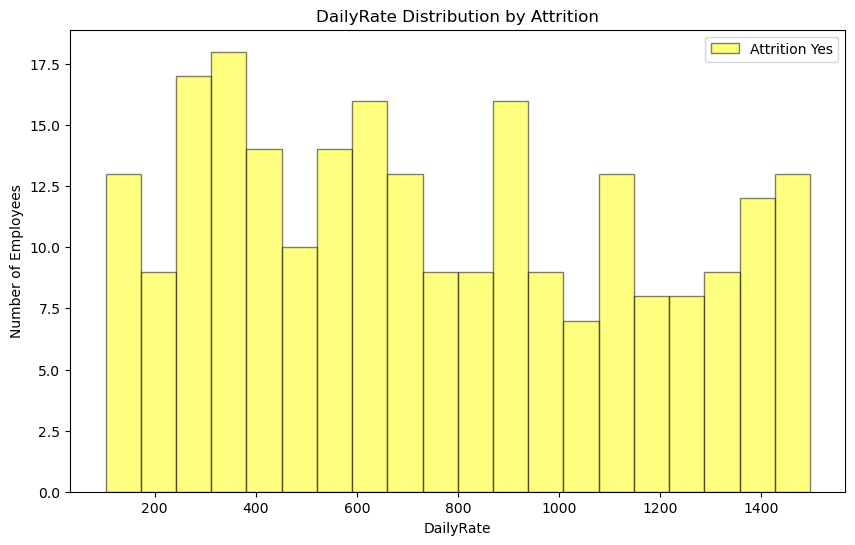

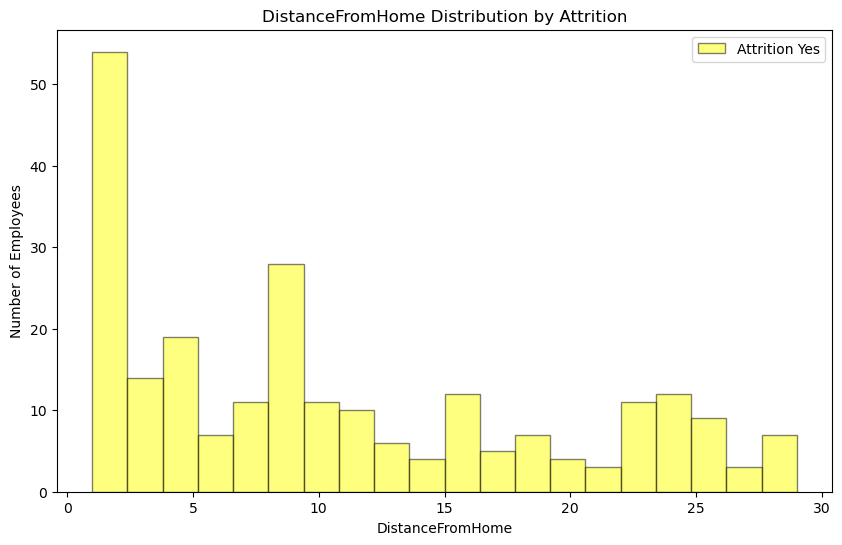

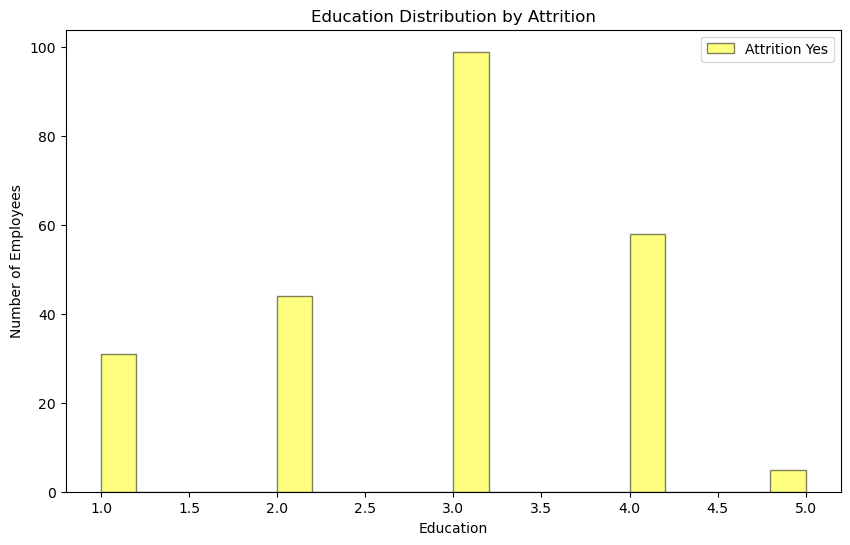

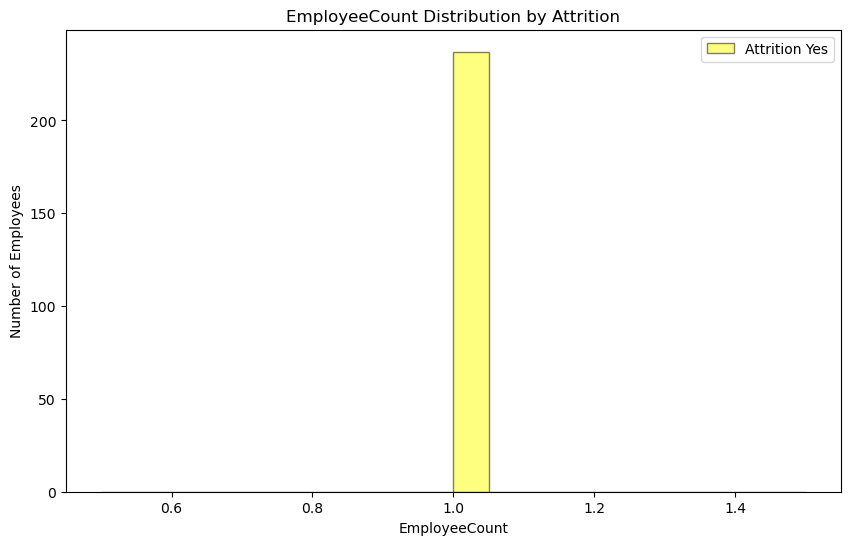

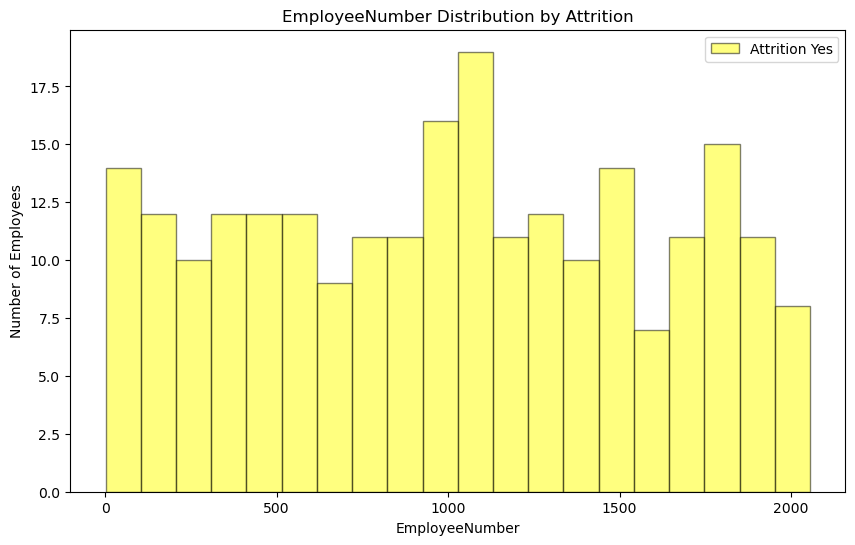

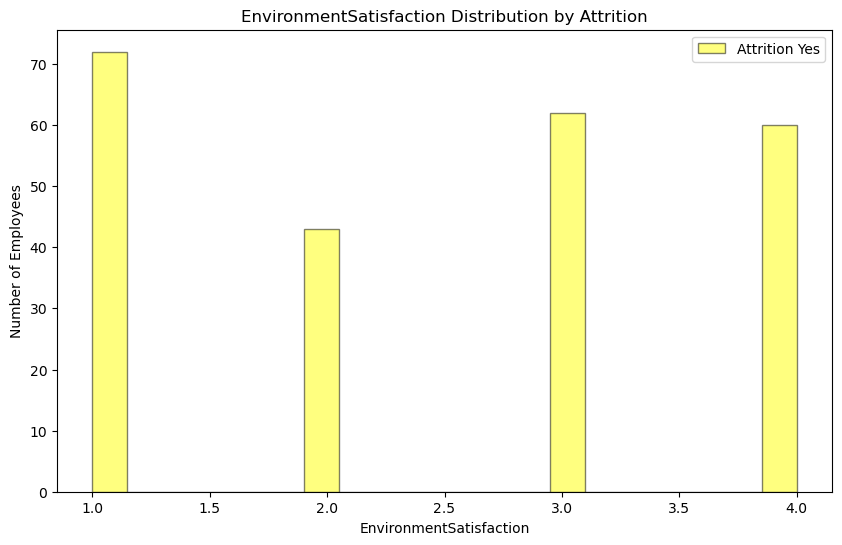

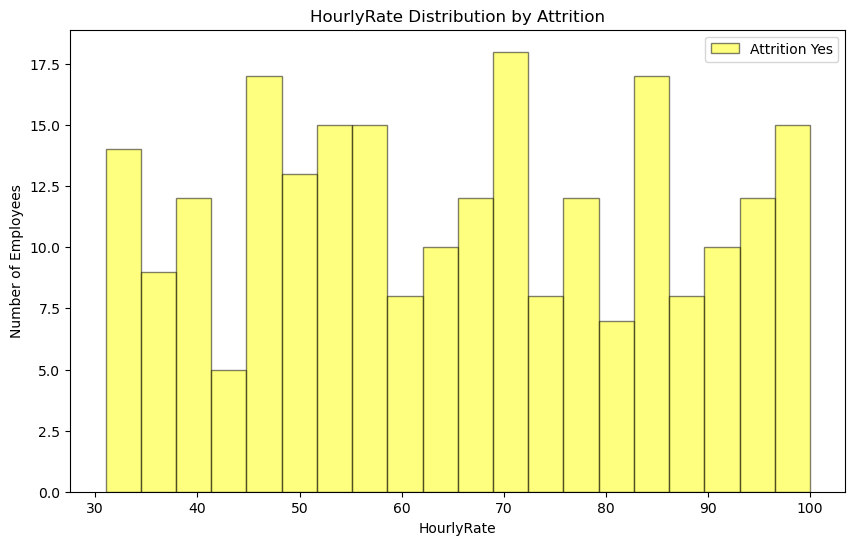

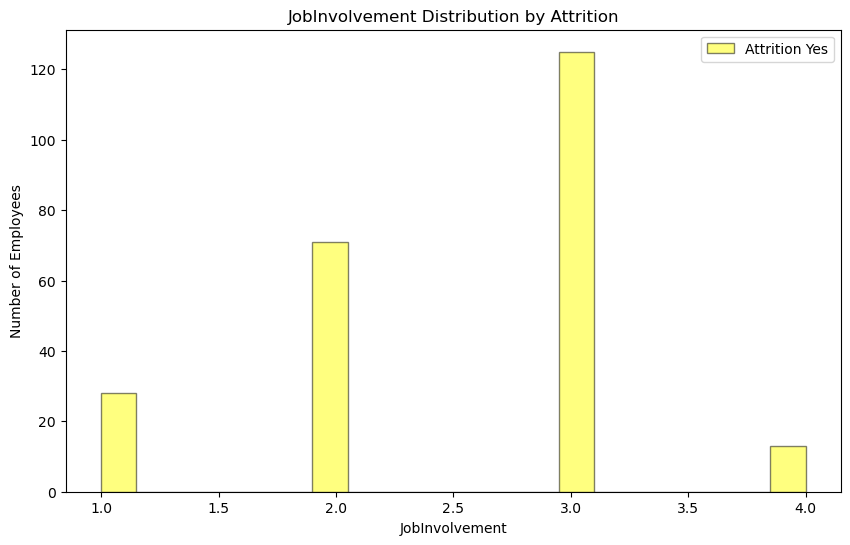

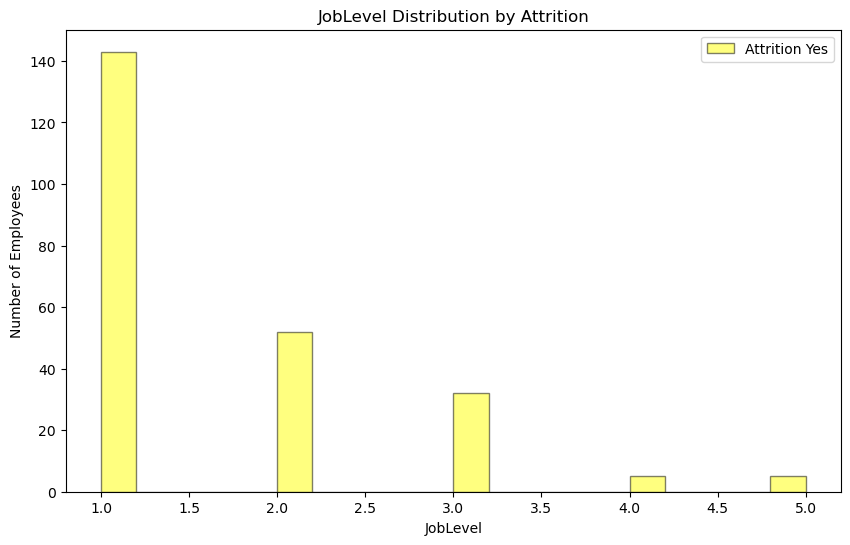

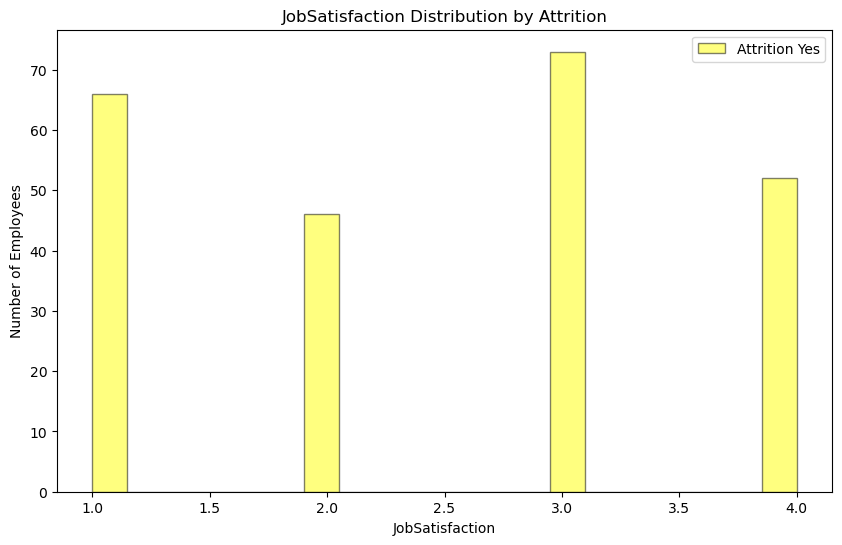

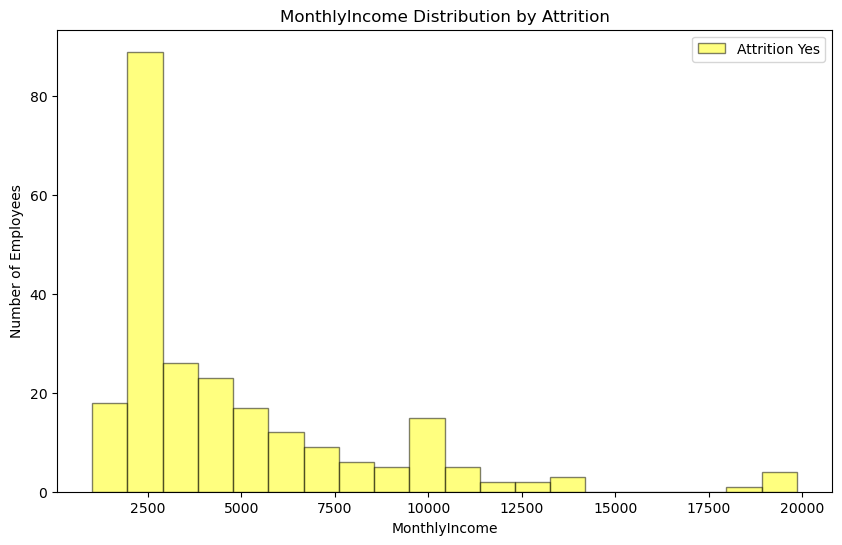

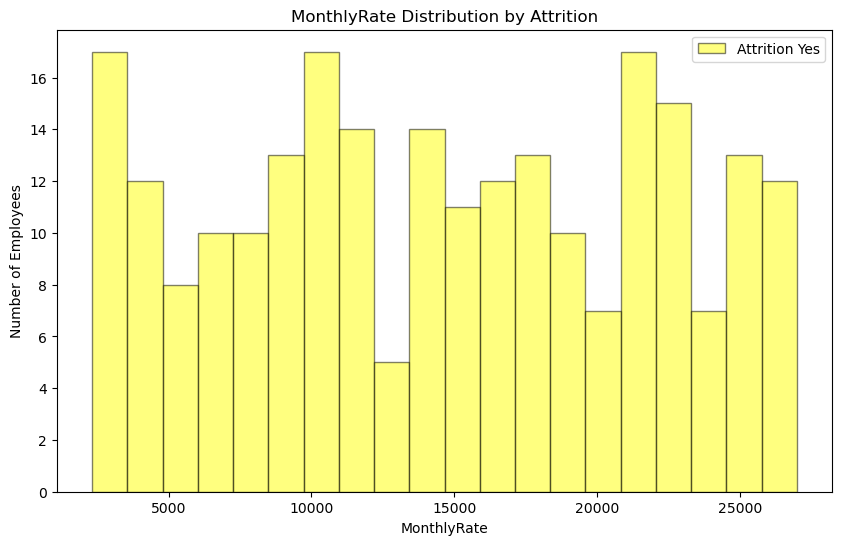

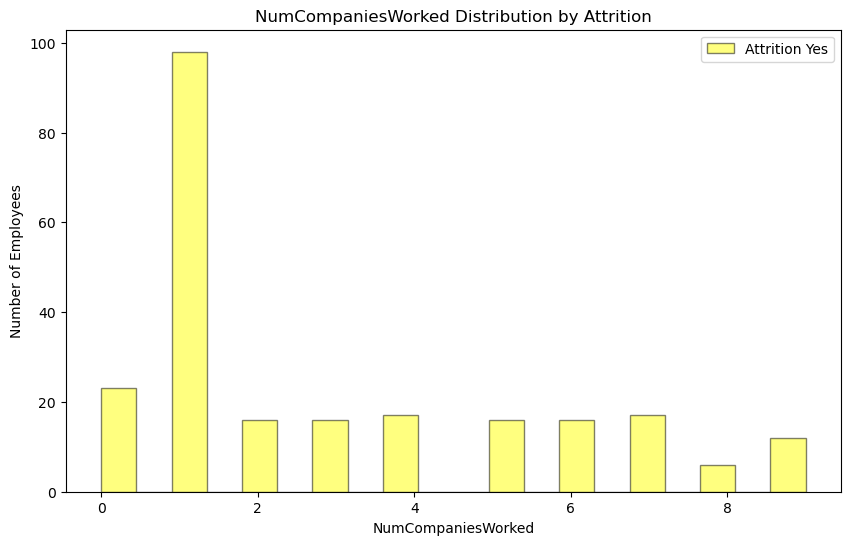

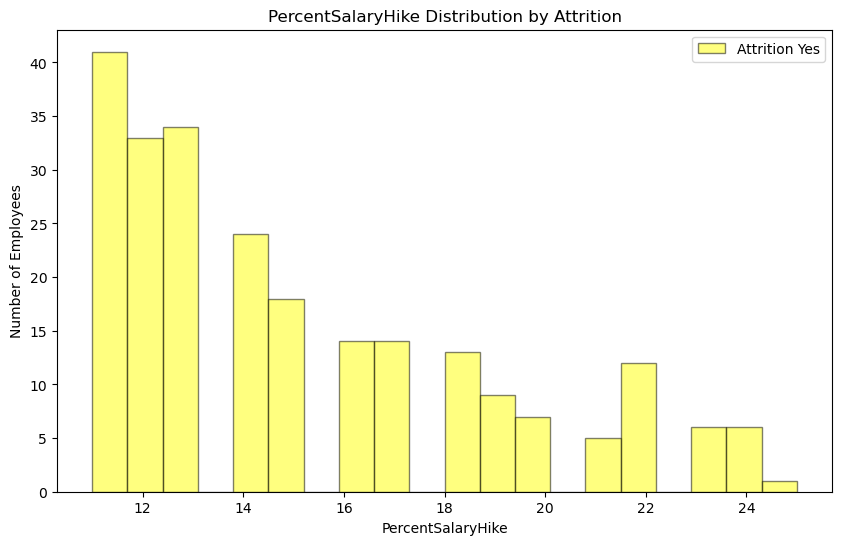

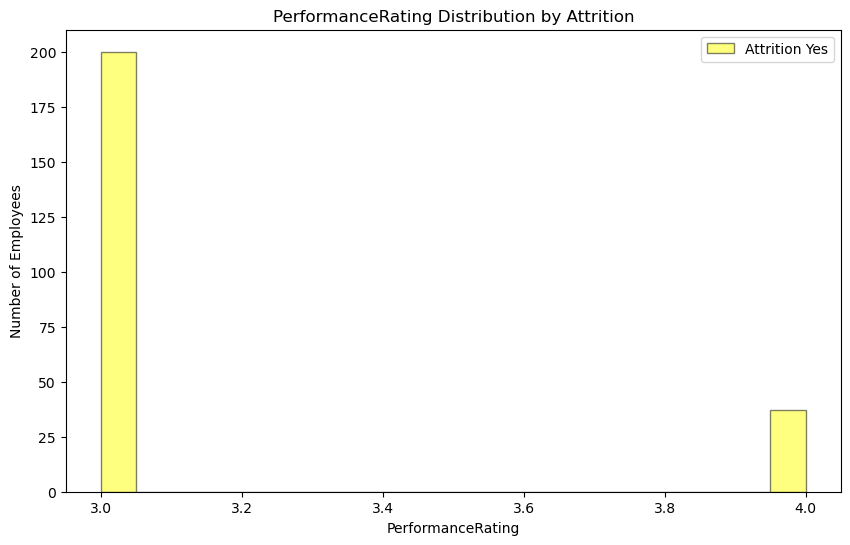

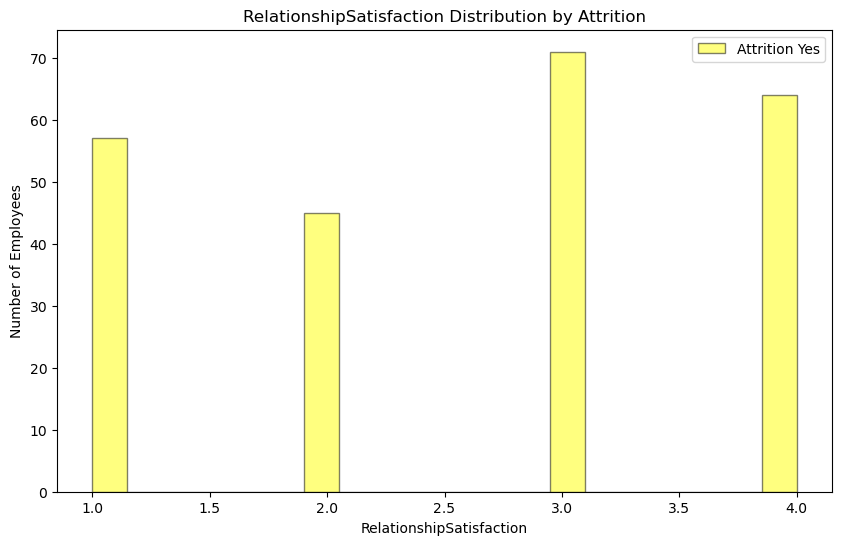

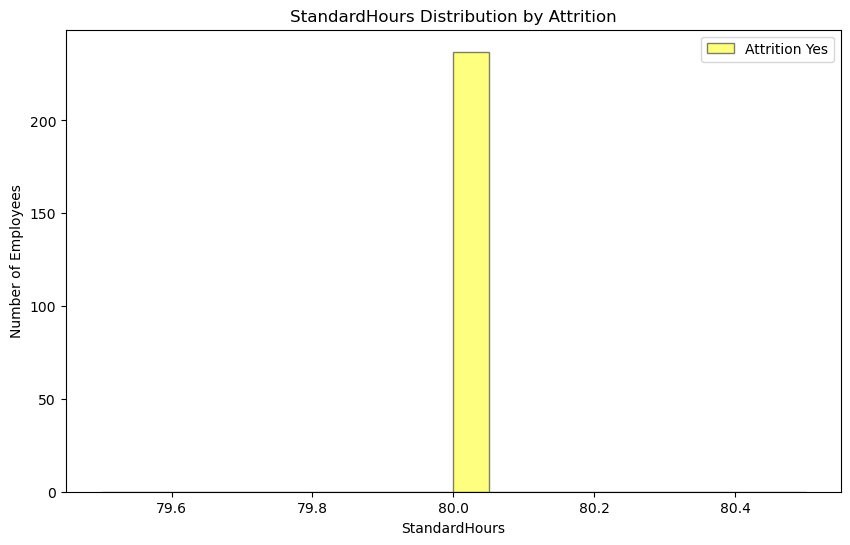

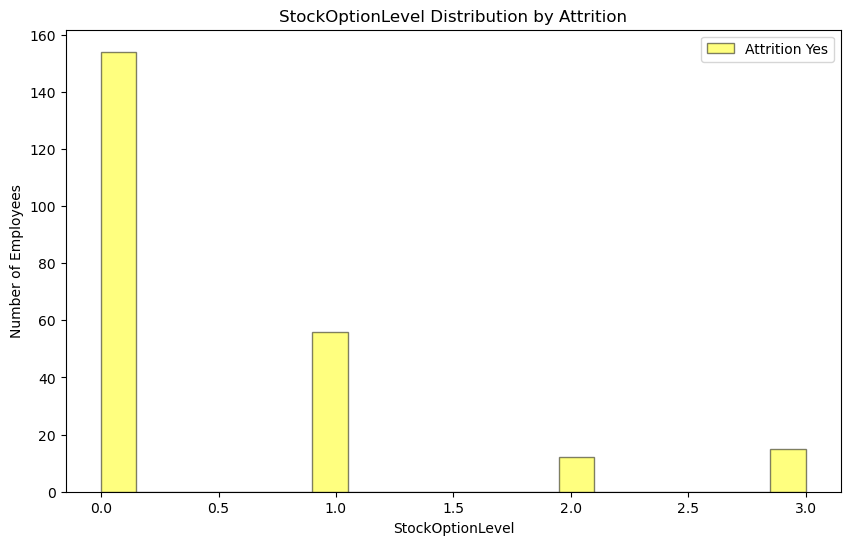

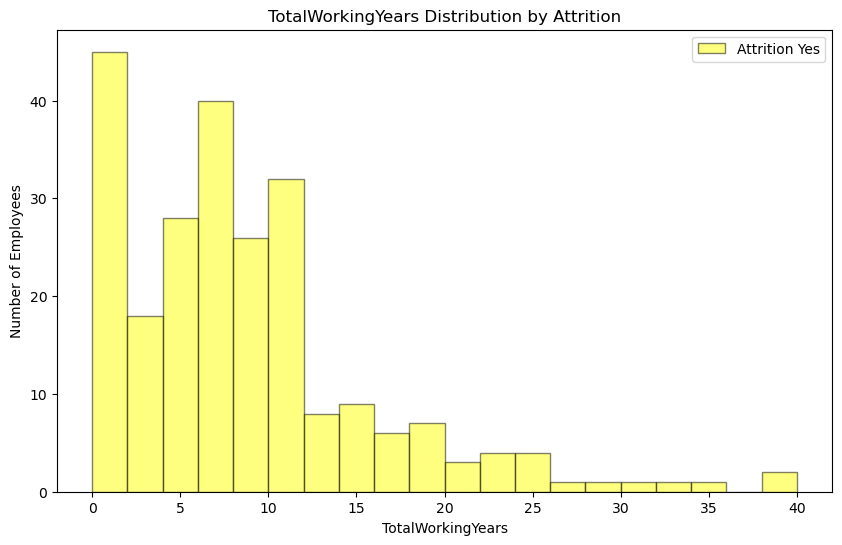

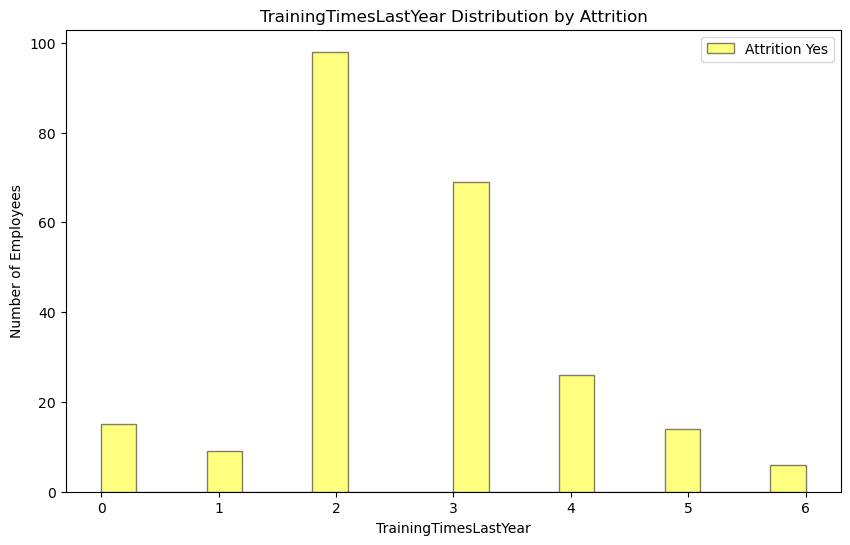

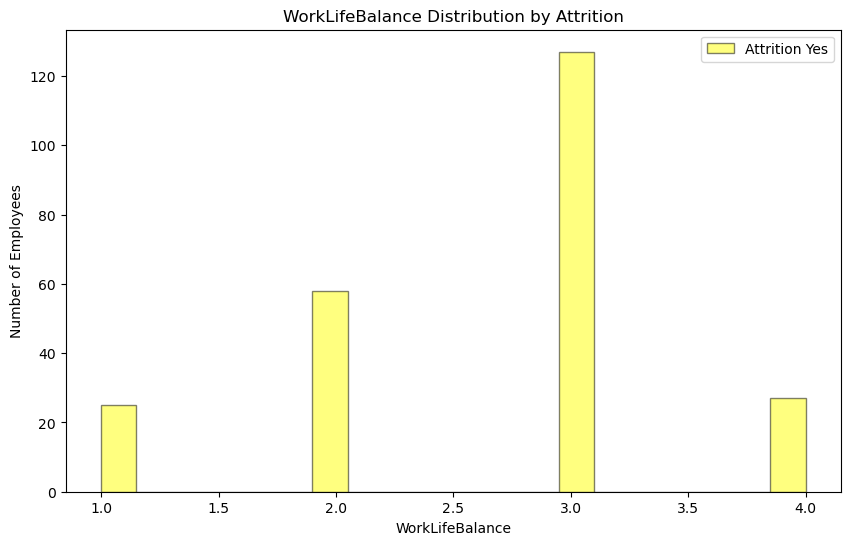

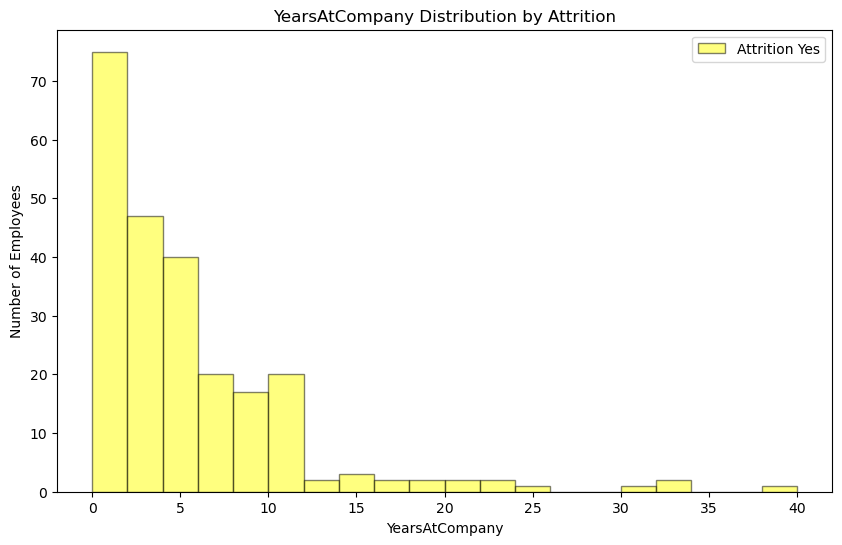

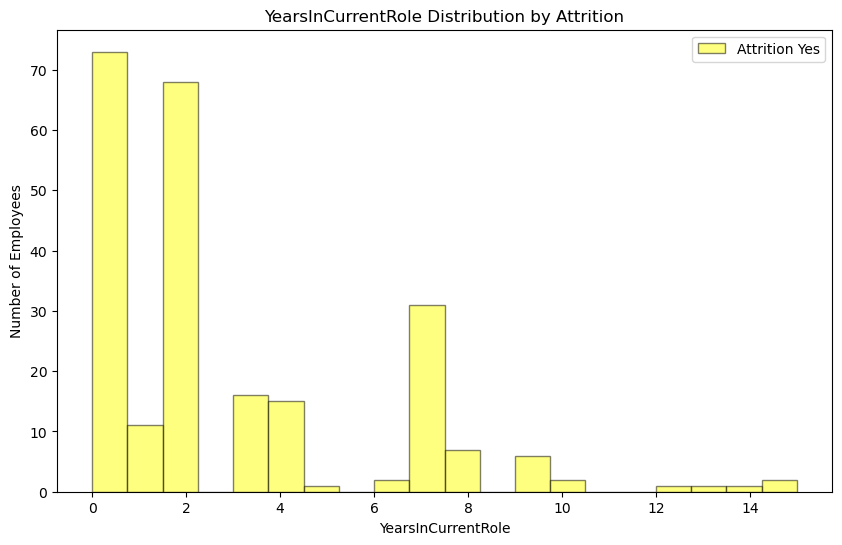

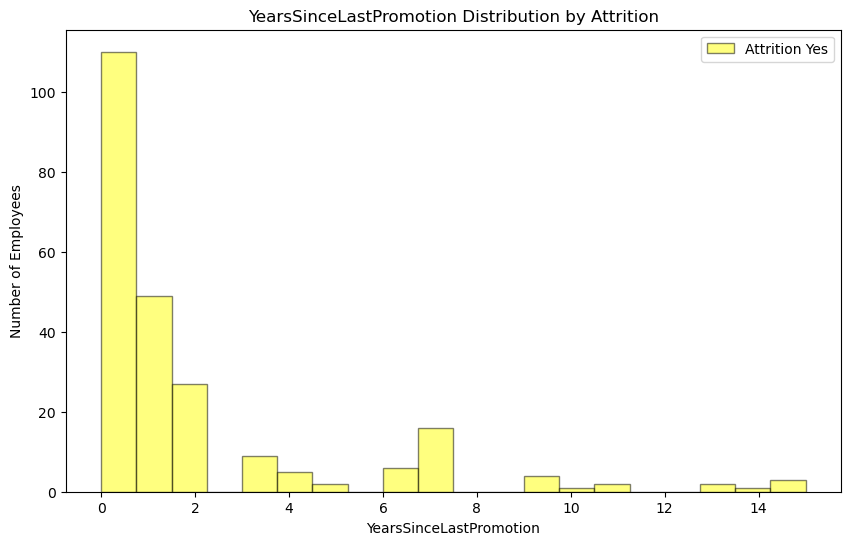

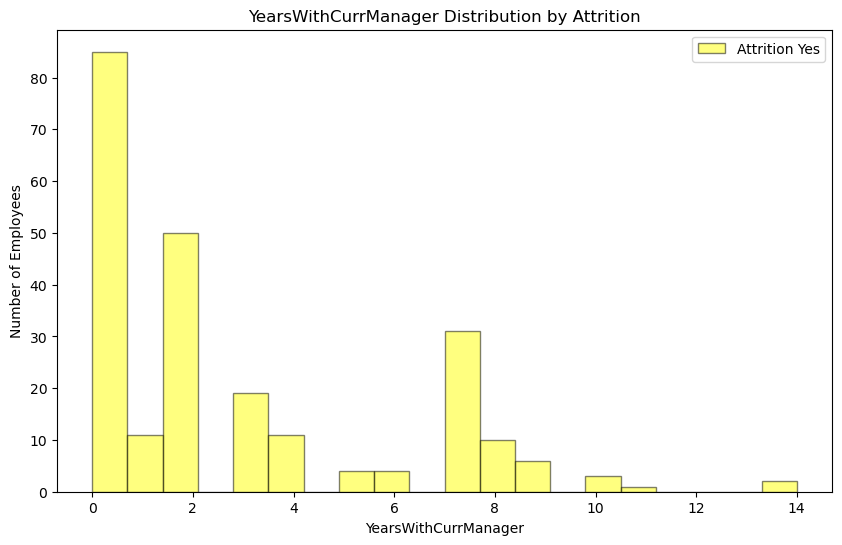

In [9]:
# Group data based on the "Attrition" column
attrition_yes = data[data['Attrition'] == 'Yes']

# Loop through columns and create histograms
for column in data.columns:
    if data[column].dtype != 'object':
        plt.figure(figsize=(10, 6))
        plt.hist(attrition_yes[column], bins=20, alpha=0.5, label='Attrition Yes', color='yellow', edgecolor='black')
        plt.xlabel(column)
        plt.ylabel('Number of Employees')
        plt.title(f'{column} Distribution by Attrition')
        plt.legend()
        plt.show()

###### Here are some insights from the figures:
- Employees between the ages of 26 and 36 have a higher likelihood of attrition.
- Individuals with Bachelor's and Master's degrees are more likely to leave, while those with Doctorates are more likely to stay.
- Lower job levels are associated with a higher probability of employee attrition.
- Employees with lower monthly salaries are more inclined to leave.
- Employees who have worked at only one company previously are at a higher risk of leaving.
- A smaller percentage of salary hike is correlated with a greater likelihood of attrition.
- A lower stock option level is associated with an increased chance of attrition.
- Individuals with 12 years or less of total work experience and time at the current company are more likely to leave.

<Axes: >

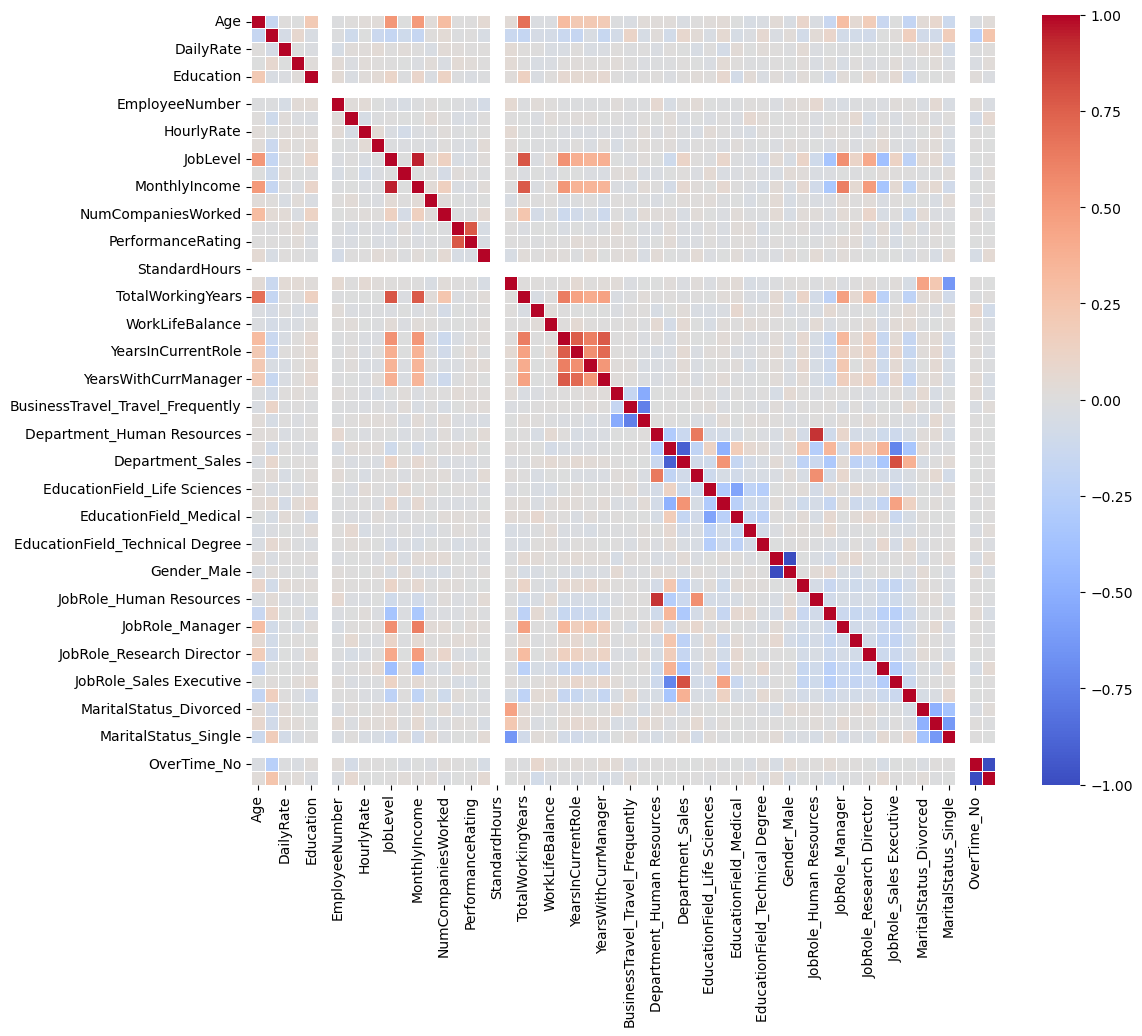

In [10]:
plt.figure(figsize=(12, 10))
sns.heatmap(encoded_data.corr(), cmap='coolwarm', linewidths=0.5)

In [11]:
# Converting the bool columns to int 
for column in encoded_data.columns:
    if encoded_data[column].dtypes == 'bool':
        encoded_data[column] = encoded_data[column].astype(int)

In [12]:
# Ensure that it worked
encoded_data.dtypes

Age                                  int64
Attrition                            int64
DailyRate                            int64
DistanceFromHome                     int64
Education                            int64
EmployeeCount                        int64
EmployeeNumber                       int64
EnvironmentSatisfaction              int64
HourlyRate                           int64
JobInvolvement                       int64
JobLevel                             int64
JobSatisfaction                      int64
MonthlyIncome                        int64
MonthlyRate                          int64
NumCompaniesWorked                   int64
PercentSalaryHike                    int64
PerformanceRating                    int64
RelationshipSatisfaction             int64
StandardHours                        int64
StockOptionLevel                     int64
TotalWorkingYears                    int64
TrainingTimesLastYear                int64
WorkLifeBalance                      int64
YearsAtComp

In [13]:
# split the target from the features
X = encoded_data.drop("Attrition", axis=1)
y = encoded_data.Attrition

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#### Modeling & Evaluation

In [18]:
# Create a LazyClassifier instance
clf = LazyClassifier(predictions=True)

# Fit the models to your data and get a summary of model performance
models = clf.fit(X_train, X_test, y_train, y_test)

# Print the model performance summary
print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:04<00:00,  5.97it/s]

[LightGBM] [Info] Number of positive: 190, number of negative: 986
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000620 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1453
[LightGBM] [Info] Number of data points in the train set: 1176, number of used features: 52
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.161565 -> initscore=-1.646632
[LightGBM] [Info] Start training from score -1.646632


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:04<00:00,  6.14it/s]

(                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
NearestCentroid                    0.71               0.73     0.73      0.75   
BernoulliNB                        0.83               0.71     0.71      0.83   
LinearDiscriminantAnalysis         0.86               0.66     0.66      0.85   
GaussianNB                         0.65               0.65     0.65      0.69   
AdaBoostClassifier                 0.86               0.65     0.65      0.84   
LogisticRegression                 0.86               0.65     0.65      0.84   
CalibratedClassifierCV             0.87               0.65     0.65      0.85   
LinearSVC                          0.86               0.64     0.64      0.84   
Perceptron                         0.83               0.64     0.64      0.82   
SGDClassifier                      0.83               0.64     0.64      0.82   
XGBClassifier              

In [19]:
# Create a random forest classifier without feature selection
clf = SVC()

# Train and evaluate a model without the selected features
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy without selected features: ", accuracy)


Accuracy without selected features:  0.8401360544217688


In [20]:
# Adding weights for the skewed target
class_weights = {0: 1, 1: 6}

rf = RandomForestClassifier(class_weight=class_weights)

# Train and evaluate a model without the selected features
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy without selected features: ", accuracy)

Accuracy without selected features:  0.8537414965986394


#### End Of The Task